# Human Resources Attrition and Performance Analytics


## 1. Importing libraries

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, classification_report
from sklearn.metrics import mean_squared_error

## 2. Importing datasets

In [ ]:
url = 'https://raw.githubusercontent.com/m-bermudez/ISM6251-ML-Project/refs/heads/main/EmployeeAttrition.csv'
df = pd.read_csv(url)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 3. Re-factoring the data

In [ ]:
type_map = {
    'object': 'category'
}
for column in df.columns:
    original_data_type = df[column].dtype.name
    if original_data_type in type_map:
        df[column] = df[column].astype(type_map[original_data_type])

## 4. Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   int64   
 11  Gender                    1470 non-null   category
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   int64 

In [ ]:
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


## Data Vizualization

In [ ]:
sns.set_palette("viridis")

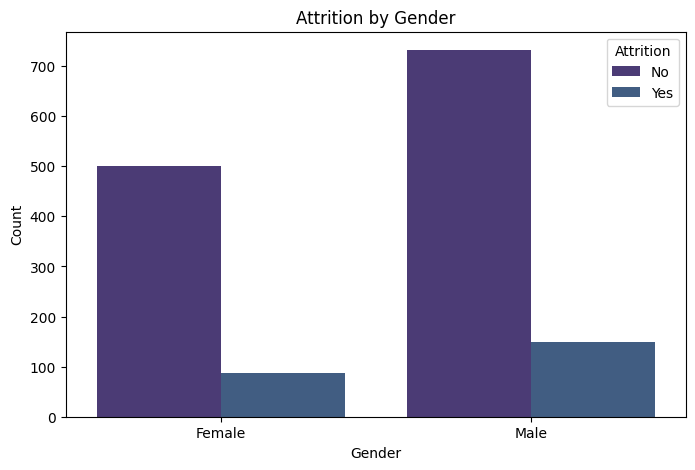

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


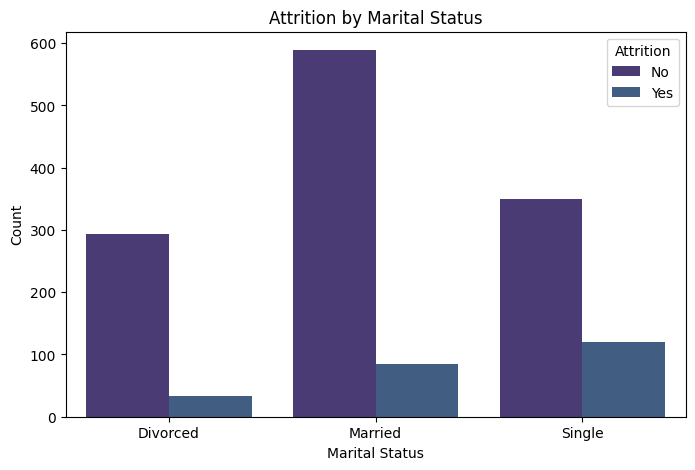

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='MaritalStatus', hue='Attrition')
plt.title('Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

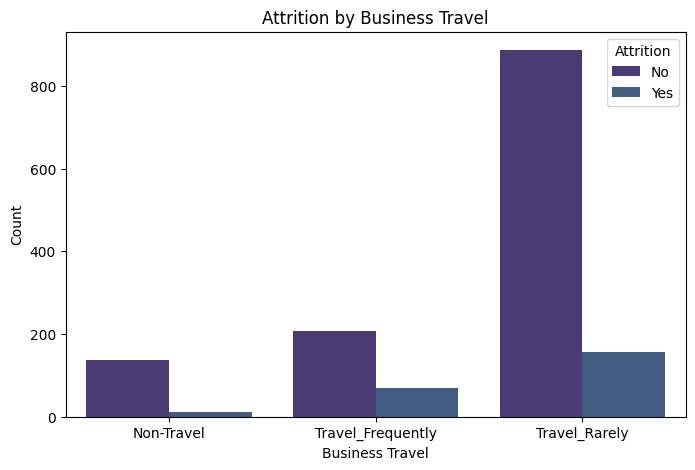

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='BusinessTravel', hue='Attrition')
plt.title('Attrition by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.show()

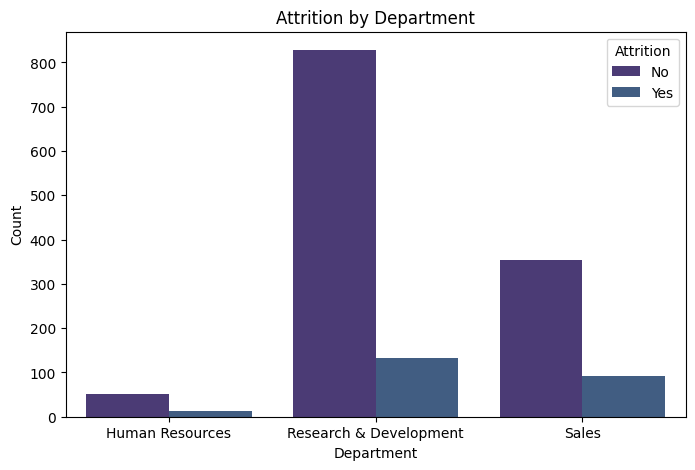

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()


<ipython-input-116-c02f707eddfa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='Age', palette='viridis')


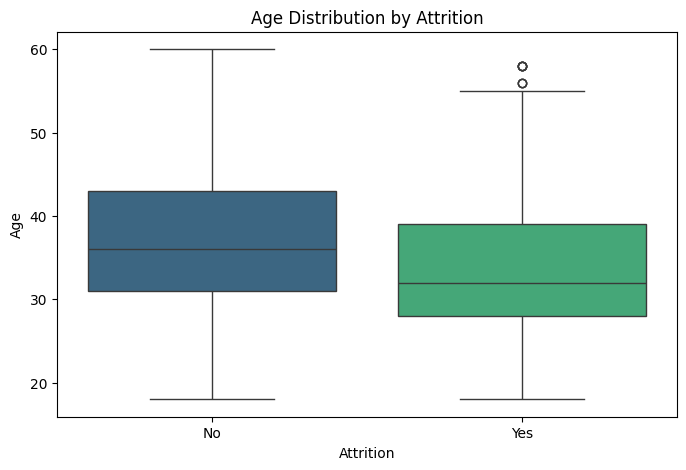

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Attrition', y='Age', palette='viridis')
plt.title('Age Distribution by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

<ipython-input-117-ad93b70dbca5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Attrition', y='MonthlyIncome', palette='viridis')


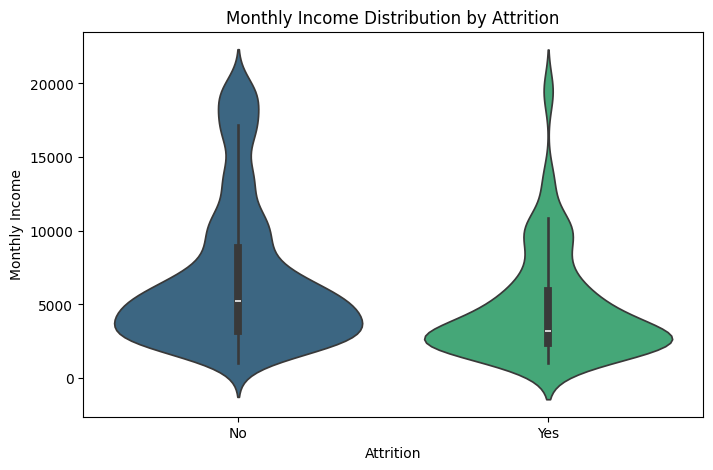

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Attrition', y='MonthlyIncome', palette='viridis')
plt.title('Monthly Income Distribution by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

<ipython-input-118-647057bf58f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x='Attrition', y='DistanceFromHome', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


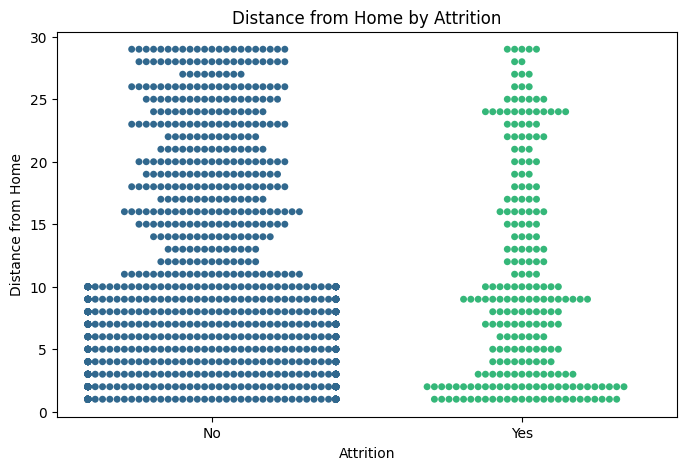

In [ ]:
plt.figure(figsize=(8, 5))
sns.swarmplot(data=df, x='Attrition', y='DistanceFromHome', palette='viridis')
plt.title('Distance from Home by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Distance from Home')
plt.show()

<ipython-input-119-9bd8d4c86bf0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Attrition', y='YearsAtCompany', palette='viridis', jitter=True)


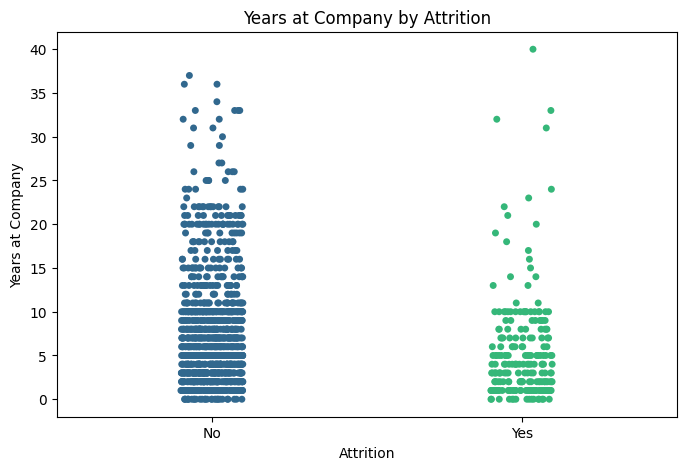

In [ ]:
plt.figure(figsize=(8, 5))
sns.stripplot(data=df, x='Attrition', y='YearsAtCompany', palette='viridis', jitter=True)
plt.title('Years at Company by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Years at Company')
plt.show()

<ipython-input-120-f7716cbe300f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Attrition', y='JobSatisfaction', palette='viridis', ci=None)
<ipython-input-120-f7716cbe300f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Attrition', y='JobSatisfaction', palette='viridis', ci=None)


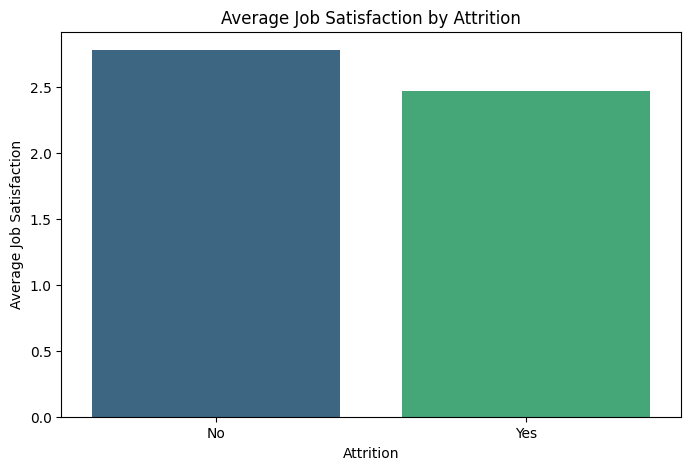

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Attrition', y='JobSatisfaction', palette='viridis', ci=None)
plt.title('Average Job Satisfaction by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Average Job Satisfaction')
plt.show()

<ipython-input-121-b95441b99391>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='TotalWorkingYears', palette='viridis')


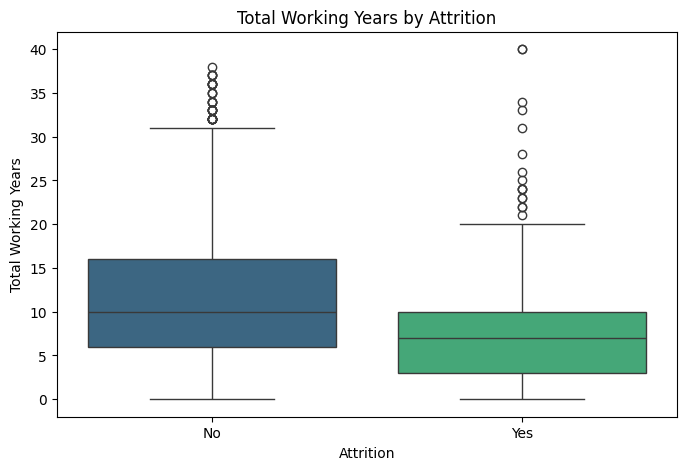

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Attrition', y='TotalWorkingYears', palette='viridis')
plt.title('Total Working Years by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Total Working Years')
plt.show()

## 5. Encoding Data

In [ ]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include=['category']).columns
label_encoders = {}

print("Encoding Guide:")
print("-" * 50)

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

    # Print the mapping for the current column
    mapping = {index: label for index, label in enumerate(le.classes_)}
    print(f"Column: {col}")
    for original, encoded in mapping.items():
        print(f"  {encoded} -> {original}")
    print("-" * 50)


Encoding Guide:
--------------------------------------------------
Column: Attrition
  No -> 0
  Yes -> 1
--------------------------------------------------
Column: BusinessTravel
  Non-Travel -> 0
  Travel_Frequently -> 1
  Travel_Rarely -> 2
--------------------------------------------------
Column: Department
  Human Resources -> 0
  Research & Development -> 1
  Sales -> 2
--------------------------------------------------
Column: EducationField
  Human Resources -> 0
  Life Sciences -> 1
  Marketing -> 2
  Medical -> 3
  Other -> 4
  Technical Degree -> 5
--------------------------------------------------
Column: Gender
  Female -> 0
  Male -> 1
--------------------------------------------------
Column: JobRole
  Healthcare Representative -> 0
  Human Resources -> 1
  Laboratory Technician -> 2
  Manager -> 3
  Manufacturing Director -> 4
  Research Director -> 5
  Research Scientist -> 6
  Sales Executive -> 7
  Sales Representative -> 8
------------------------------------------

In [ ]:
# Drop irrelevant columns
df.drop(columns=['EmployeeNumber', 'Over18'], inplace=True)

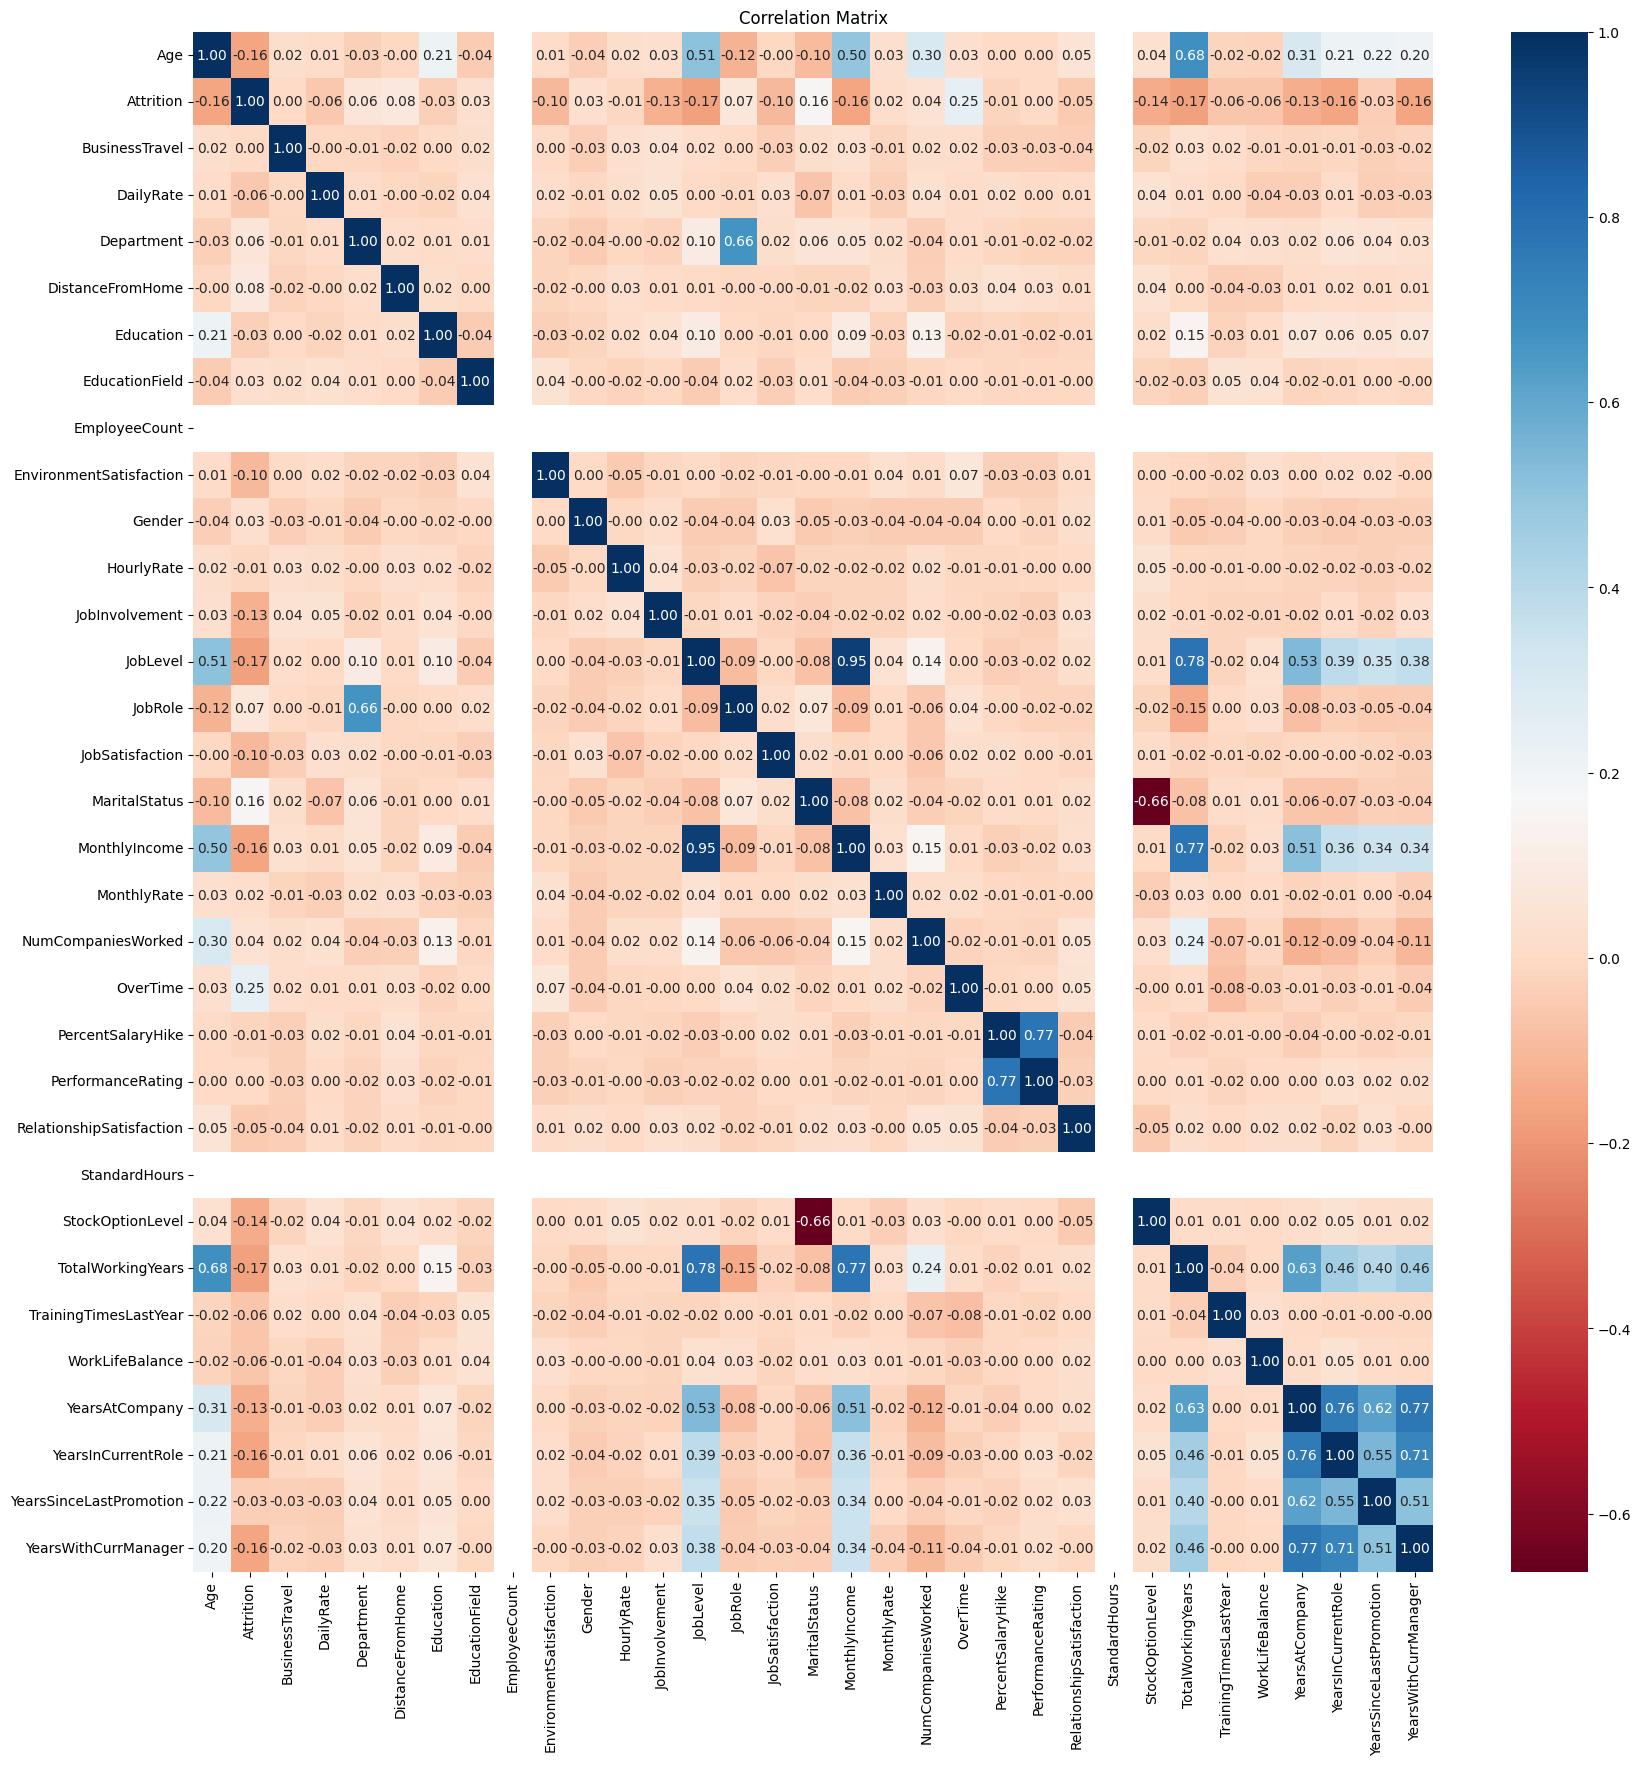

In [ ]:
plt.figure(figsize=(20, 20))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="RdBu")
plt.title('Correlation Matrix')
plt.show()

## Data Normalization

In [ ]:
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

## Train-Split Data

In [ ]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Importance - Regression Model

<ipython-input-135-c4c05af0fbab>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


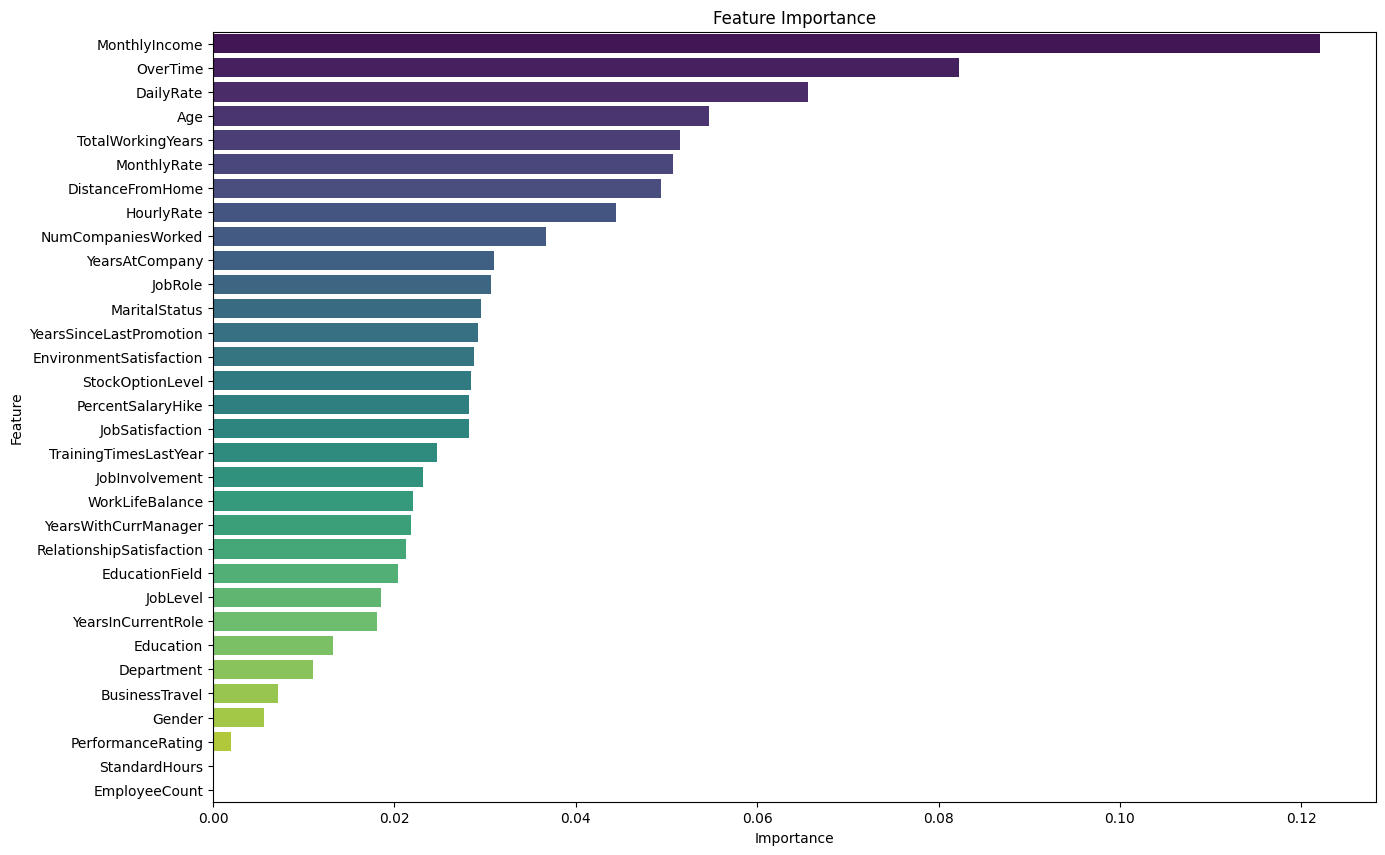

In [ ]:
plt.figure(figsize=(15, 10))
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

# Visualize feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.show()


In [ ]:
threshold = 0.01

# Select features above the threshold
important_features = importance_df[importance_df['Importance'] > threshold]['Feature']
print(f"Selected features: {important_features.tolist()}")

# Reduce the feature set
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

# Optional: Check the shape of the reduced dataset
print(f"Original feature count: {X_train.shape[1]}")
print(f"Reduced feature count: {X_train_reduced.shape[1]}")

Selected features: ['MonthlyIncome', 'OverTime', 'DailyRate', 'Age', 'TotalWorkingYears', 'MonthlyRate', 'DistanceFromHome', 'HourlyRate', 'NumCompaniesWorked', 'YearsAtCompany', 'JobRole', 'MaritalStatus', 'YearsSinceLastPromotion', 'EnvironmentSatisfaction', 'StockOptionLevel', 'PercentSalaryHike', 'JobSatisfaction', 'TrainingTimesLastYear', 'JobInvolvement', 'WorkLifeBalance', 'YearsWithCurrManager', 'RelationshipSatisfaction', 'EducationField', 'JobLevel', 'YearsInCurrentRole', 'Education', 'Department']
Original feature count: 32
Reduced feature count: 27


<ipython-input-138-5a0d5611b124>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


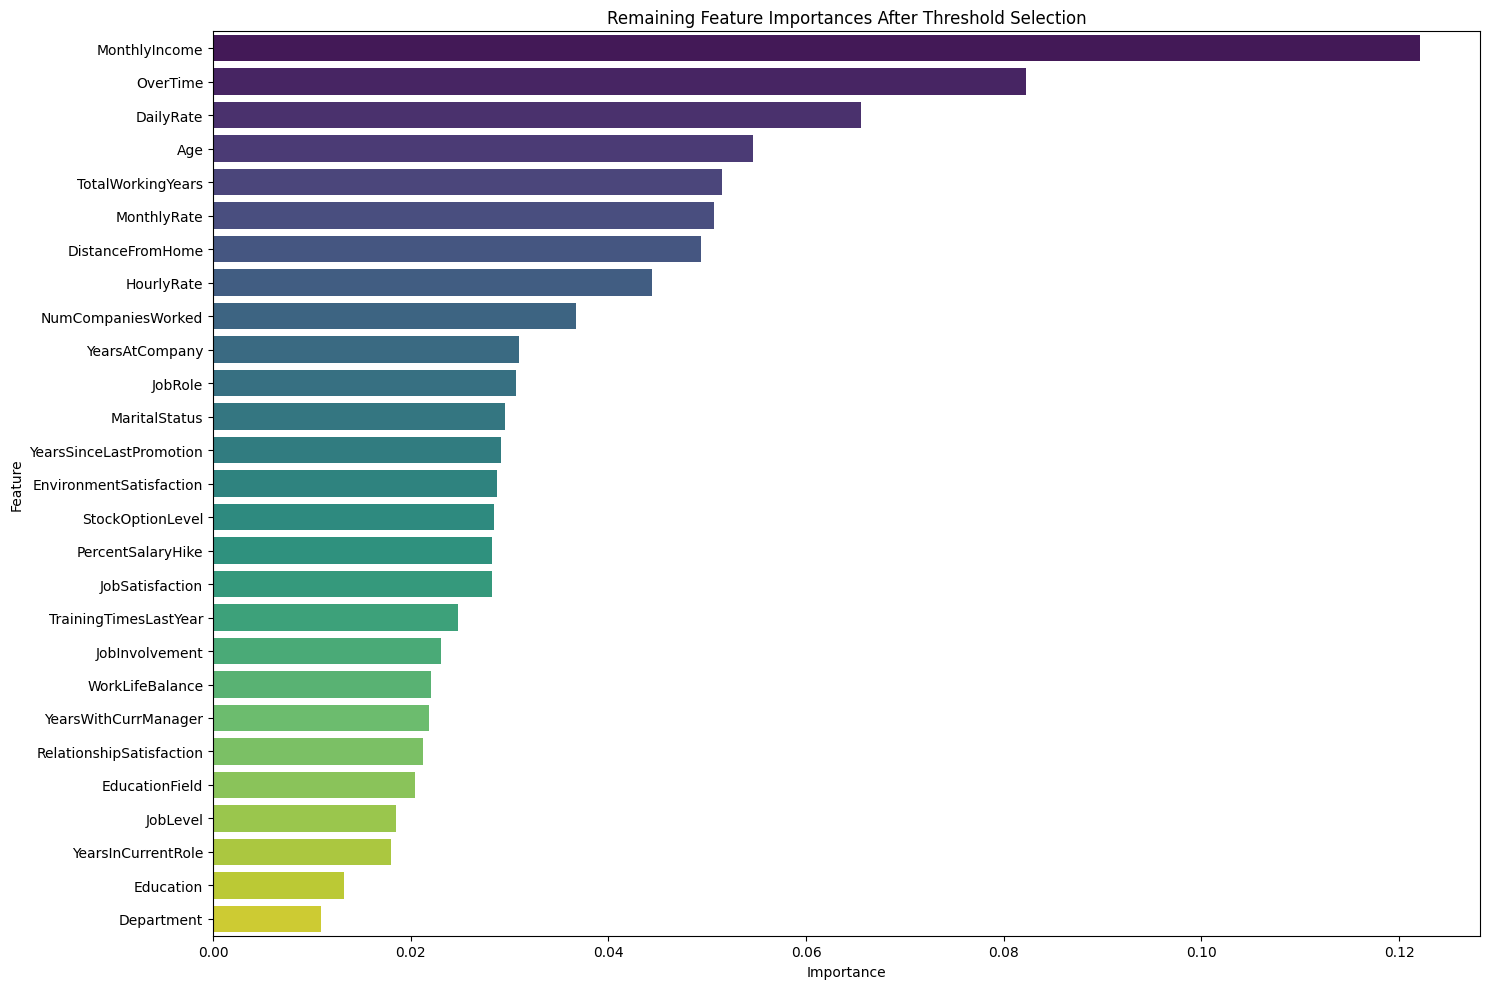

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(
    data=importance_df[importance_df['Importance'] > threshold],
    x='Importance',
    y='Feature',
    palette='viridis'
)
plt.title('Remaining Feature Importances After Threshold Selection')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
models = {
    'Decision Tree': DecisionTreeRegressor(),  # Changed to Regressor
    'KNN': KNeighborsRegressor(),            # Changed to Regressor
    'Random Forest': RandomForestRegressor(),  # Changed to Regressor
    'Gradient Boosting': GradientBoostingRegressor() # Changed to Regressor
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)  # Example: using R-squared
    results[name] = r2
    print(f"{name} R-squared: {r2}")
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name} MSE: {mse}")
    print(f"{name} RMSE: {rmse}")

Decision Tree R-squared: -1.0989441930618402
Decision Tree MSE: 1.7858059482378066
Decision Tree RMSE: 1.3363405060978308
KNN R-squared: -0.016953242835595628
KNN MSE: 0.8652355580194442
KNN RMSE: 0.9301803900424068
Random Forest R-squared: 0.06385610859728508
Random Forest MSE: 0.7964820290122888
Random Forest RMSE: 0.8924584186460951
Gradient Boosting R-squared: 0.10862827103926131
Gradient Boosting MSE: 0.758389356387336
Gradient Boosting RMSE: 0.8708555312951374
